In [ ]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
from img_util import imshow


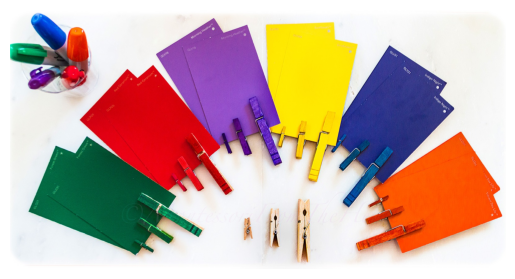

In [4]:
#dilation-something to grow
#erosion - to remove
img = cv2.imread('img2.jpg')
imshow(img[:,:,::-1] ,'')

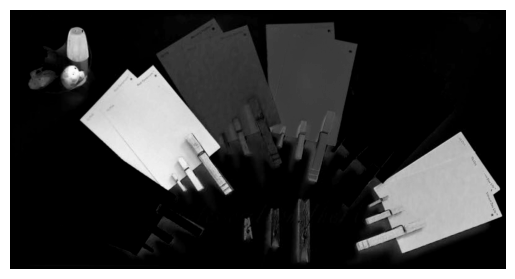

In [6]:
red_img = cv2.subtract(
    img[:,:,-1],cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
)
imshow(red_img, '','gray')

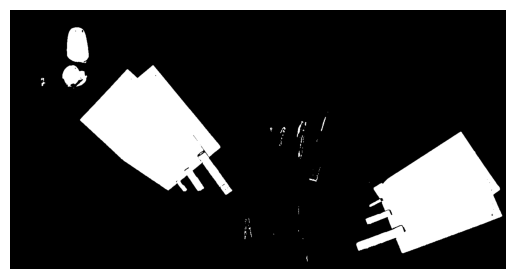

In [8]:
_, red_bw = cv2.threshold(red_img, 60,255, cv2.THRESH_BINARY)
imshow(red_bw,'','gray')

In [11]:
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
strel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

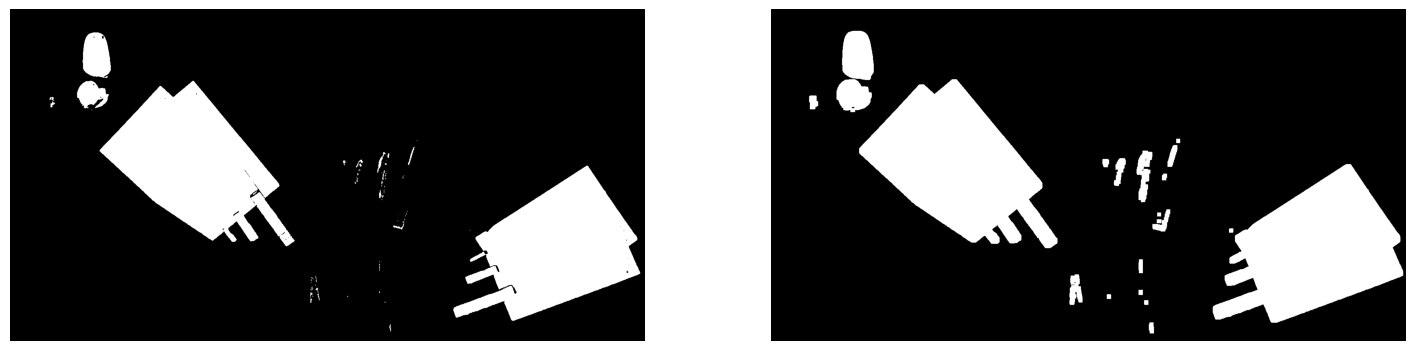

In [12]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_dilate = cv2.dilate(red_bw, strel)
imshow(red_dilate, '','gray')

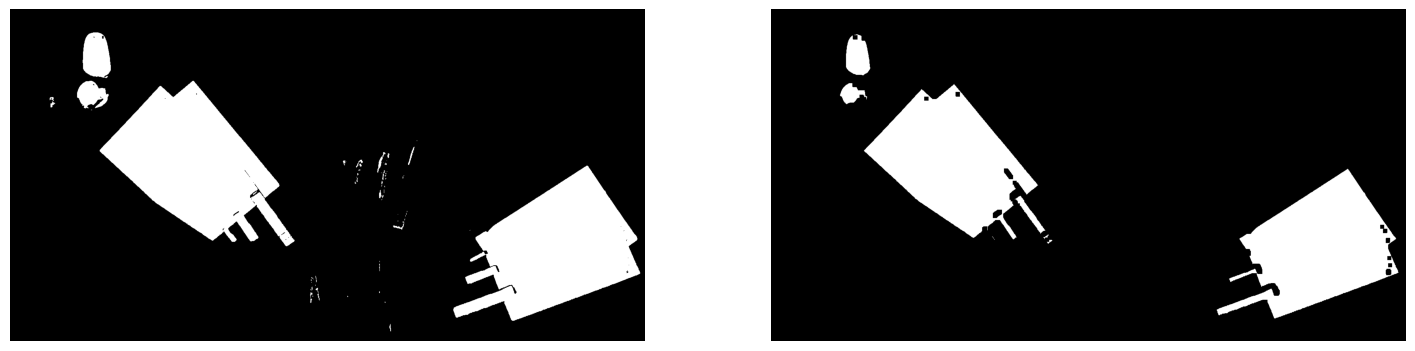

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_erode = cv2.erode(red_bw, strel)
imshow(red_erode, '','gray')

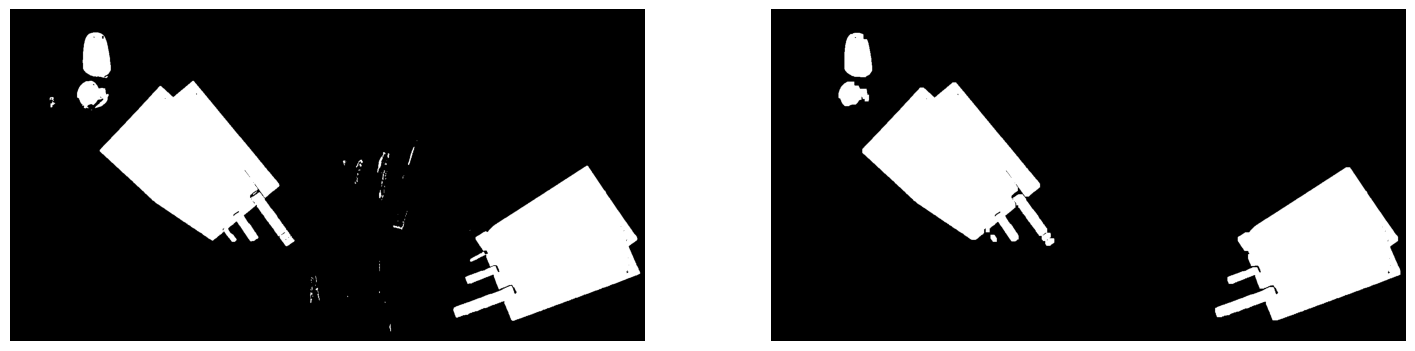

In [14]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_dilate = cv2.morphologyEx(red_bw,cv2.MORPH_OPEN ,strel, iterations=1)
imshow(red_dilate, '','gray')

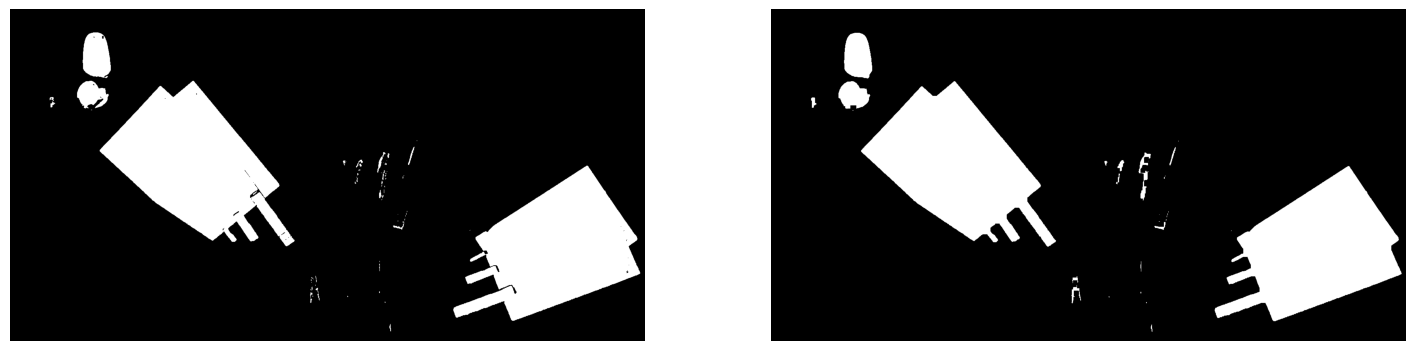

In [17]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_close = cv2.morphologyEx(red_bw,cv2.MORPH_CLOSE ,strel)
imshow(red_close, '','gray')

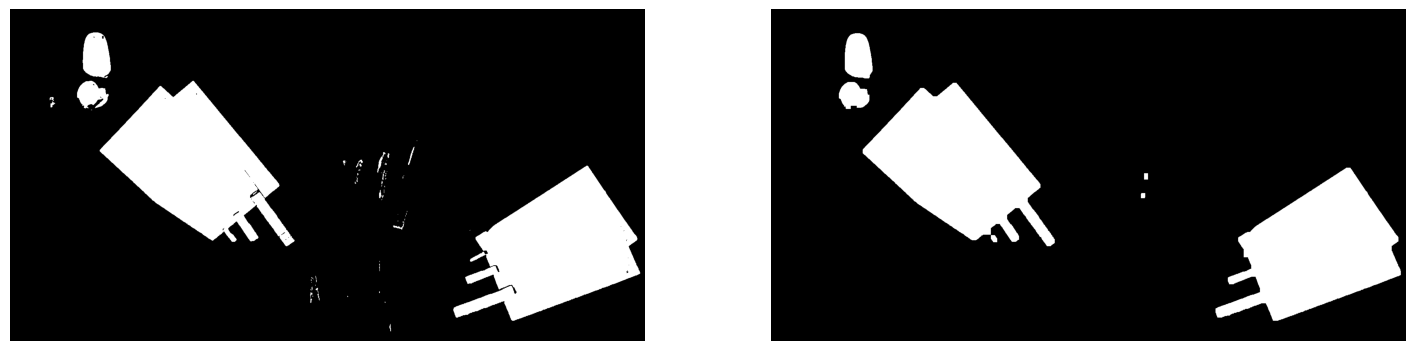

In [18]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_close2 = cv2.morphologyEx(red_close,cv2.MORPH_OPEN ,strel)
imshow(red_close2, '','gray')

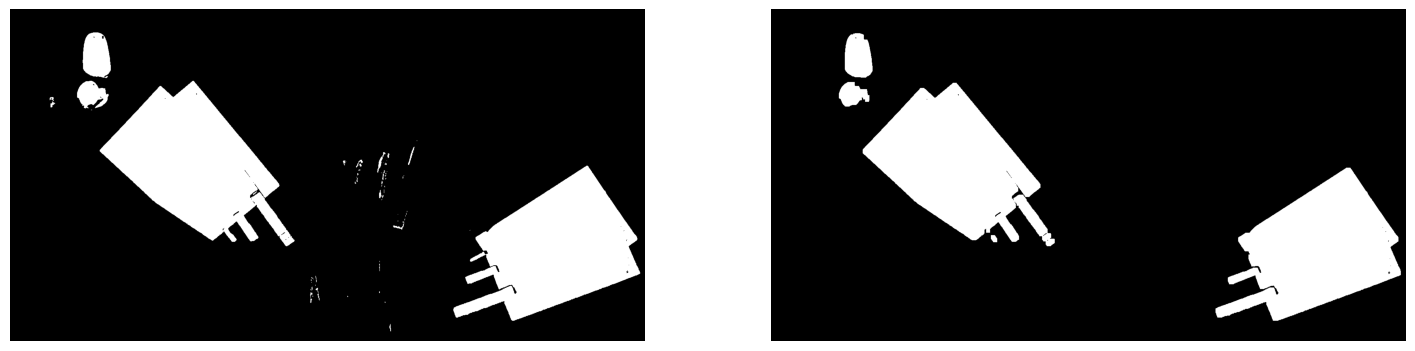

In [22]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_close2 = cv2.morphologyEx(red_dilate,cv2.MORPH_OPEN ,strel,iterations=1)
imshow(red_close2, '','gray')

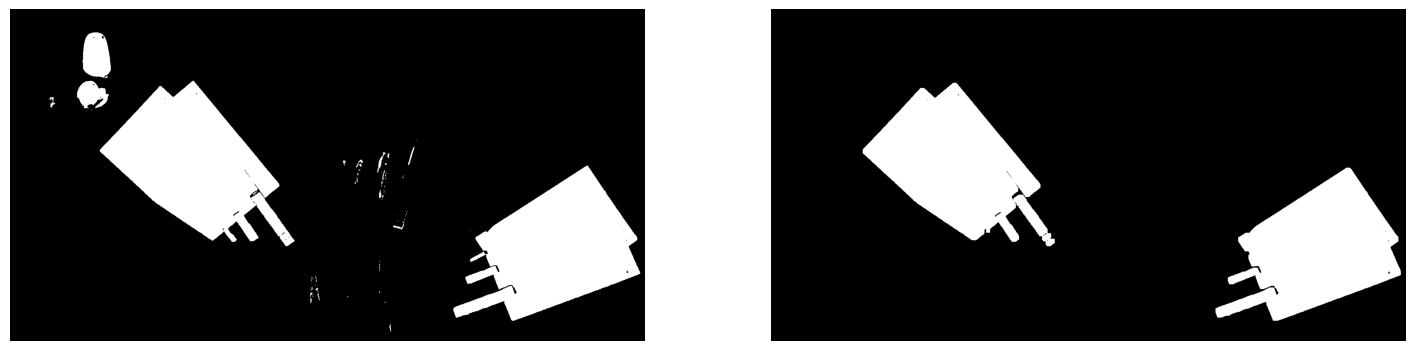

In [31]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_close3 = ski.morphology.remove_small_objects(
    red_close2.astype(bool),15000)
imshow(red_close3, '','gray')

In [34]:
red_close3.dtype

dtype('bool')

In [37]:
rp = ski.measure.regionprops(ski.measure.label(red_close3.astype('uint8'))
)
rp

In [39]:
ski.measure.label(red_close3.astype('uint8')
).max()

2

In [40]:
(red_close3.astype('uint8')*255).max()

255

In [41]:
#summary


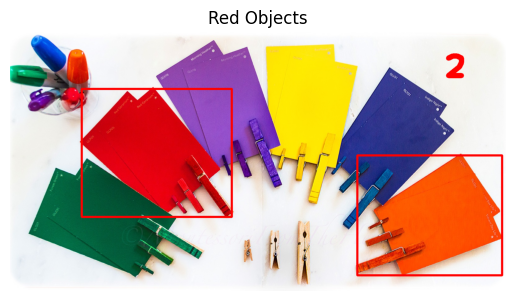

In [52]:
img_copy = img.copy()
for r in rp:
    y1,x1,y2,x2 = r.bbox
    cv2.rectangle(img_copy, (x1,y1), (x2,y2), color=[0,0,255], thickness=5)
    count = str(len(rp))
    cv2.putText(
        img_copy, count , (img_copy.shape[1]-200,150),#move along columns
     cv2.FONT_HERSHEY_PLAIN, 7,(0,0,255),thickness= 15)
    imshow(img_copy[:,:,::-1],'Red Objects')

In [6]:
vid = cv2.VideoCapture(0)
while True:
    ack, im=vid.read()#acquire video camera
    if ack:
        red_img = cv2.subtract(im[:, :, -1], cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))
        

_, red_bw = cv2.threshold(red_img, 60,255, cv2.THRESH_BINARY)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
red_dilate = cv2.dilate(red_bw, strel)
red_close2 = cv2.morphologyEx(red_dilate,cv2.MORPH_OPEN ,strel,iterations=1)
red_close3 = ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
rp = ski.measure.regionprops(ski.measure.label(red_close3.astype('uint8')))
img_copy = img.copy()
for r in rp:
    y1,x1,y2,x2 = r.bbox
    cv2.rectangle(img_copy, (x1,y1), (x2,y2), color=[0,0,255], thickness=5)
    count = str(len(rp))
    cv2.putText(
    img_copy, count , (img_copy.shape[1]-200,150),#move along columns
    cv2.FONT_HERSHEY_PLAIN, 7,(0,0,255),thickness= 15)
    cv2.imshow('Preview',im)
    key = cv2.waitKey(1)# 1, continuosly capture
    if key == ord('x'): # 
        break
cv2.destroyAllWindows()
vid.release()


In [30]:
#day 12
vid = cv2.VideoCapture(0)
while True:
    ack, im=vid.read()#acquire video camera
    if ack:
        th,red_bw= cv2.threshold(
            cv2.subtract(
                im[:, :, -3], cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                ),50,255, cv2.THRESH_BINARY
                )
        strel =cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
        red_bw = cv2.morphologyEx(
            red_bw, cv2.MORPH_CLOSE, strel, iterations=1
        )
        red_bw = ski.morphology.remove_small_objects(
            red_bw.astype(bool), 300 #remoe pixels with low resolution 
        ).astype('uint8')*255
        rps = ski.measure.regionprops(
            ski.measure.label(red_bw.astype(bool))
        )
        count = len(rps)
        img_copy = im.copy()
        cv2.putText(img_copy, str(count),(150,150),
                    cv2.FONT_HERSHEY_PLAIN, 10 ,(0,0,255),10
                    )
        for rp in rps:
            y1,x1,y2,x2 = rp.bbox
            cv2.rectangle(img_copy, (x1,y1), (x2,y2), (0,0,255), thickness=5)
        cv2.imshow('Preview',img_copy)
        key = cv2.waitKey(1)
        if key == ord('x'): 
            break
cv2.destroyAllWindows()
vid.release()

In [5]:
#face detectino and detection- viola-jones(Haarcsacade features)
fd = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
vid = cv2.VideoCapture(0)
while True:
    ack, im=vid.read()#acquire video camera
    if ack:
        faces = fd.detectMultiScale(im,1.2,5)#image ko scale ,minimum features
        for x,y,w,h in faces:
            cv2.rectangle(im,(x,y),(x+w,y+h),(255,255,255),1)
        cv2.imshow('Preview',im)
        key = cv2.waitKey(1)
        if key == ord('x'): 
            break
cv2.destroyAllWindows()
vid.release()

In [7]:
#face detectino and detection- viola-jones(Haarcsacade features)
import cv2
fd = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
vid = cv2.VideoCapture(0)
counter = 0
while True:
    ack, im=vid.read()#acquire video camera
    if ack:
        faces = fd.detectMultiScale(im,1.2,5)#image ko scale ,minimum features
        if len(faces) ==1:
            counter += 1
            for x,y,w,h in faces:
                cv2.rectangle(im,(x,y),(x+w,y+h),(255,255,255),3)
                face_img = im[y:y+h,x:x+w,:].copy()
                cv2.imwrite(
                    r'faces/yashraj/face_{0}.png'.format(counter),
                    face_img 
                    )
                 # here r is for path
        cv2.imshow('Preview',im)
        key = cv2.waitKey(1)
        if counter == 50 :
                    break
        if key == ord('x'): 
            break
cv2.destroyAllWindows()
vid.release()

In [ ]:
#face_recognition